# Mini Project: Evaporation Resistance of Chinese Clothing


# Problem Statement<a class="anchor" id="Problem-Statement"></a>

Measurements of total air volume, mean air gap size, and total evaporative resistance of 39 Chinese clothing ensembles of 6 groups.

Group 1: 2-piece clothing including short sleeve shirts or short dresses

Group 2: Robe-typed clothing

Group 3: 2-piece garments w/ short gowns and trousers or long dresses

Group 4: Long-sleeve coats and trousers with decorations

Group 5: Robes and trousers

Group 6: 3-piece clothing

**My aim is to model a relationship of the total evporative resistance of the different chinese clothing ensembles based on the data we are given**

# Solution<a class="anchor" id="Solution"></a>

## 1. Initialise Libraries <a class="anchor" id="initialise-libraries"></a>
Essential libraries for linear algebra operations and visualization.

In [ ]:
# scientific computing library
import numpy as np

# visualization tools
import matplotlib.pyplot as plt

import pandas as pd

# show plots without need of calling `.show()`
%matplotlib inline

# prettify plots
plt.rcParams['figure.figsize'] = [20, 10]

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#initialise random seed
np.random.seed(7)

## 2. Data Engineering<a class="anchor" id="data-engineering"></a>

### Data Extraction
The first step is to extract the data from the csv titled "airlayers_evaporate.csv" into a pandas dataframe.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airlayers_evaporate.csv to airlayers_evaporate.csv


In [ ]:
dataset = pd.read_csv('airlayers_evaporate.csv')
dataset

,clothID,clothGrp,costume,airVol,airGapSz,evapRes
0,1,1,Li,22.99,15.00,13.7
1,2,1,Russian,27.98,16.23,16.8
2,3,1,Dai,24.41,17.42,16.5
3,4,2,Hezhe,33.21,21.67,17.3
4,5,2,Nu,42.07,25.92,18.5
5,6,2,Oroqen,44.30,30.05,19.0
6,7,2,Mongolian,46.00,29.05,18.0
7,8,2,Tibetan,93.06,51.39,23.2
8,9,3,Zhuang,26.19,16.99,18.8
9,10,3,Tajik,30.76,19.60,17.5


In [ ]:
print('x values: total air volume, mean air gap size')
print('y value: evaporative resistance')

x values: total air volume, mean air gap size
y value: evaporative resistance


### Splitting the dataset
Now that I have determined my features and labels, it is time to split my data set into training and test sets.

For the purposes of this peoject, I shall split the data 70-30, meaining 70% of the data is training data and the reamining 30% is test data


In [ ]:
tr = dataset.sample(frac = 0.7)
print(tr) # 27 samples

te = dataset.sample(frac = 0.3)
te # 12 samples

    clothID  clothGrp    costume  airVol  airGapSz  evapRes
21       22         4       Dong   33.60     19.64     21.1
1         2         1    Russian   27.98     16.23     16.8
22       23         4      Nakhi   34.83     19.70     21.0
2         3         1        Dai   24.41     17.42     16.5
9        10         3      Tajik   30.76     19.60     17.5
27       28         5       Daur   32.70     18.61     20.5
15       16         3      Gelao   28.93     17.79     19.5
18       19         4        Bai   27.95     15.53     20.2
13       14         3       Jino   28.06     16.27     20.1
20       21         4        Yao   32.29     18.62     21.2
17       18         3     Bouyei   84.67     46.54     21.1
29       30         5       Xibe   64.02     35.60     24.4
5         6         2     Oroqen   44.30     30.05     19.0
33       34         5      Drung   47.83     27.08     24.3
35       36         5      Tujia   35.19     20.58     23.0
36       37         6         Tu   45.72

,clothID,clothGrp,costume,airVol,airGapSz,evapRes
18,19,4,Bai,27.95,15.53,20.2
2,3,1,Dai,24.41,17.42,16.5
6,7,2,Mongolian,46.00,29.05,18.0
27,28,5,Daur,32.70,18.61,20.5
5,6,2,Oroqen,44.30,30.05,19.0
32,33,5,Kazazh,39.89,20.56,22.7
33,34,5,Drung,47.83,27.08,24.3
26,27,4,Miao,50.18,27.41,23.4
24,25,4,Hui,38.52,20.84,21.2
17,18,3,Bouyei,84.67,46.54,21.1


### Exploratory Data Analysis

First, I need to conduct preliminary data analysis. I need to determine if all the features they've provided me are useful and actually contribute to the model. If I simply add more and more features into my model, I may actually be introducing more noise.

First, let me plot a graph of my features, air gap size vs total air volume.

Text(0,0.5,'Total air volume')

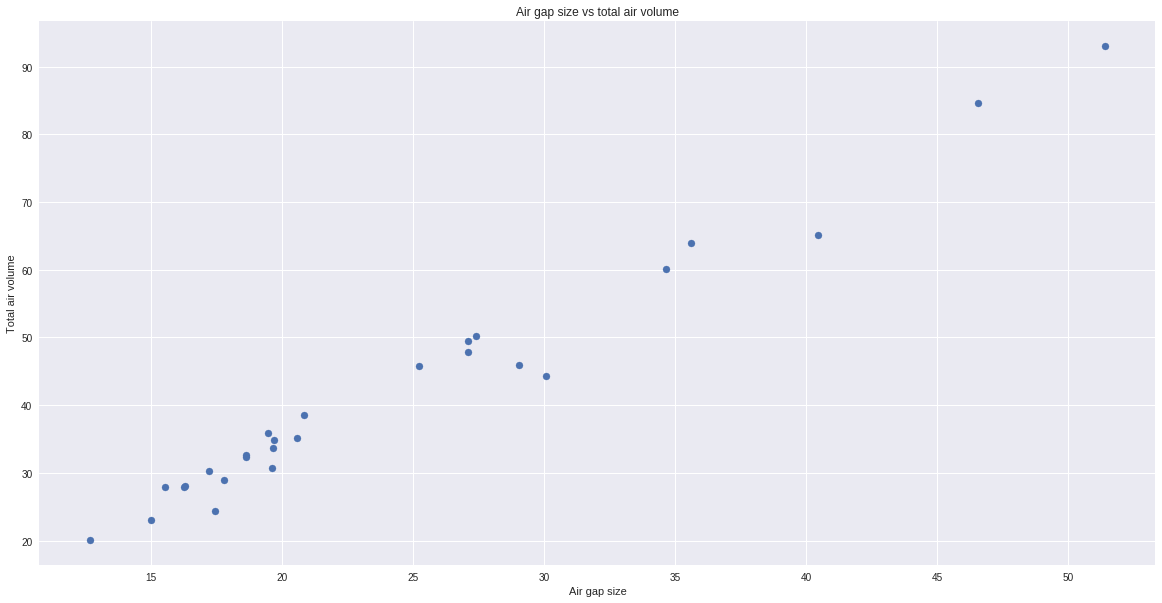

In [ ]:
airGapSz = tr.iloc[:, 4]
airVol = tr.iloc[:, 3]
plt.scatter(airGapSz, airVol)
plt.title('Air gap size vs total air volume')
plt.xlabel('Air gap size')
plt.ylabel('Total air volume')

## Conclusion
I notice that air gap size and total air volume are conveniently linearly related.

Ultimately what this means for my model is that I only need to include one of the two features (either one is fine) because one is linearly related to the other:

$$x_{2}=b*x_{1}$$

Therefore, if I include it in my model it can be simplified to:
$$\hat{y^{(i)}}=w_{0}+(w_{1}+b*w_{2})*x_{1}^{(i)}$$

This is redundant and hence one of the features can be dropped from my model.

## 3. Train Model<a class="anchor" id="train-model"></a>

### Assign test and training values
Now that I have split the data into a train and test dataframe, it is time to assign the values to X_train, X_test, y_train, y_test and convert them into numpy arrays

In [ ]:
X_train = np.array(airVol)
X_test = np.array(te.iloc[:, 3])
y_train = np.array(tr.iloc[:, 5])
y_test = np.array(te.iloc[:, 5])

### Normalisation
Normalise the data to get better results.


In [ ]:
def normalise(X):
  mean_x=np.mean(X,axis=0)
  std_x=np.std(X,axis=0)
  normalised_x=(X-mean_x)/std_x
  return normalised_x


X_train = normalise(X_train)
#print(X_train.size)
X_test = normalise(X_test)
y_train = normalise(y_train)
y_test = normalise(y_test)

### Add bias terms to the data
Add a column of ones to the X_train and X_test arrays (to represent the bias terms)

In [ ]:
m_train = y_train.size
m_test = y_test.size

X_train = X_train.reshape(m_train,1)
X_test = X_test.reshape(m_test,1)

X_train = np.hstack((np.ones(m_train)[:, np.newaxis], X_train))
X_test = np.hstack((np.ones(m_test)[:, np.newaxis], X_test))

### Include my functions!
Include my functions for creating a multivariate linear model, calculating MSE loss and performing gradient descent below.

In [ ]:
# Function for creating a multivariate model
def multi_linear_model(W,X):
    y_hat=np.dot(X,W)
    return y_hat

In [ ]:
# function for mse
def calculate_MSE(y, y_hat,size):
    diff= y_hat - y
    diff_squared=np.power(diff,2)
    loss=1/(2*size)*np.sum(diff_squared)
    return loss

In [ ]:
# Function for updating weights based on gradient descent
def gradient_descent(W,X,y,y_hat,size,learning_rate=0.01):
    diff = y_hat-y
    W = W-(learning_rate/size)*np.dot(np.transpose(X),diff)
    print("W is: ", W)
    return W

### Model Training
Finally... train my model!

In [ ]:
#Specify number of training iterations
n_epochs = 500

n = X_train.shape[1]

#Generate Random N Weights
W=np.random.rand(n)

#Initialise Model
y_hat=multi_linear_model(W,X_train)
print(y_hat)
for _ in range(n_epochs):
    print(_)
    #Calculate loss
    loss=calculate_MSE(y_train,y_hat,m_train)
    print("loss is: ",loss)

    #Perform gradient descent
    W = gradient_descent(W,X_train,y_train,y_hat,m_train,0.1)

    #Generate new model
    y_hat = multi_linear_model(W, X_train)

[-0.55673277  0.09740219 -0.65325524  0.694551   -0.2698801  -0.47549435
 -0.03773202  0.10183234  0.08563717 -0.43551243  9.52617876  1.97171309
 -0.83545776 -0.64933474 -0.678337   -0.77717326 -0.72059349 -0.21501463
  0.97129829 -0.51953479 -0.84232043  1.61053899  2.24191069 -0.76304547
 13.94430867  1.08333398 -0.44893412]
0
loss is:  5.606276788142921
W is:  [ 0.78167842 -0.04425108  0.1379831   0.34931207  0.35178855  0.52864538
  0.22263634]
1
loss is:  1.811785123862061
W is:  [ 0.70351058 -0.099212   -0.00314002  0.20818895  0.21066543  0.38752226
  0.08151323]
2
loss is:  1.0067642718666263
W is:  [ 0.63315952 -0.09670744 -0.06965364  0.14167533  0.14415181  0.32100864
  0.0149996 ]
3
loss is:  0.7931708041610077
W is:  [ 0.56984357 -0.06995931 -0.10309492  0.10823405  0.11071053  0.28756736
 -0.01844167]
4
loss is:  0.7030582935755685
W is:  [ 0.51285921 -0.03357106 -0.12178559  0.08954339  0.09201986  0.2688767
 -0.03713234]
5
loss is:  0.6440258606375465
W is:  [ 0.461573

### Visualise results

Plot a graph of x and y values with my model.
Print my final loss for the model


The final loss is:  0.3332688321263069


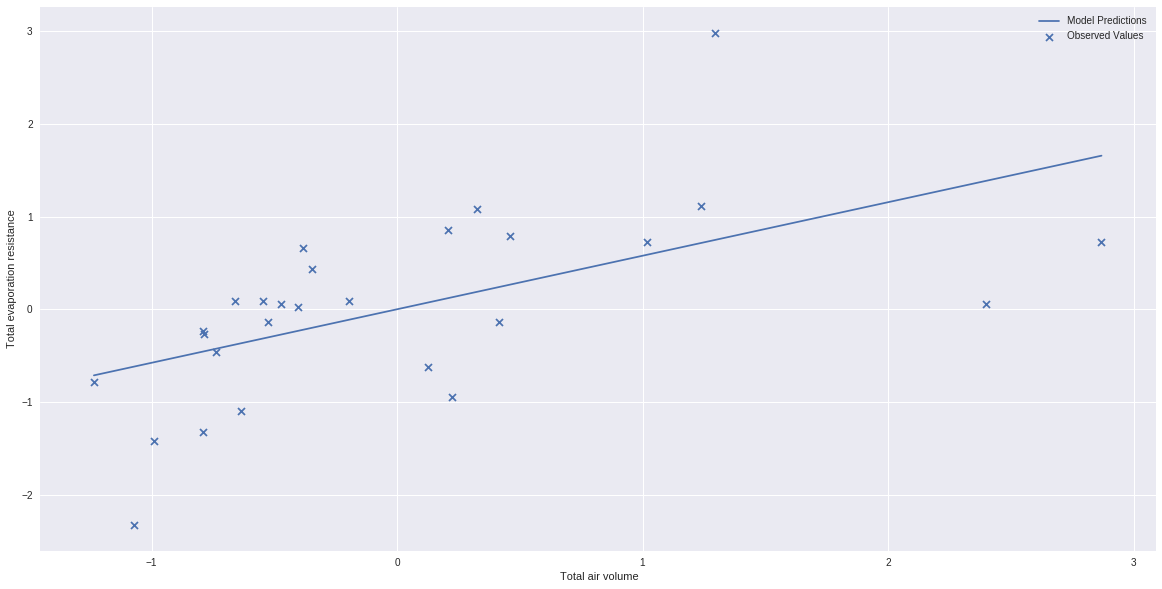

In [ ]:
#Sort my x, y and y_hat values to obtain nice graphs
x, y_hat = zip(*sorted(zip(X_train[:,1], y_hat)))
x, y_viz=zip(*sorted(zip(X_train[:,1], y_train)))

##CODE HERE (Use x for x axis, y_viz as my y_train data points and y_hat as my final linear model)
def visualize(x, y_viz=None, y_hat=None):
    plt.xlabel(" Total air volume")
    plt.ylabel("Total evaporation resistance")
    if y_viz is not None and y_hat is not None:
        #plt.plot(x, y_viz, 'x', label='Observed Values')
        plt.plot(x, y_hat, '-', label='Model Predictions')
    plt.legend();

visualize(x, y_viz, y_hat)
plt.scatter(x,y_viz,marker = 'x', label='Observed Values')
plt.legend()

print("The final loss is: ", loss)

### Model Validation
Fit my model to the test data, X_test and calculate the loss against y_test. Print the loss acquired

In [ ]:
#Fit the model to the test data
y_test_hat= multi_linear_model(W,X_test)

#Calculate the test loss for the linear model
loss_test = calculate_MSE(y_test, y_test_hat, m_test)

print(loss_test)

0.37293588982608383


## 4. Making improvements (Polynomial Modelling)<a class="anchor" id="Improvements"></a>

As it can be seen from the plot, my linear model did not perform so well. From the distribution of the data, a polynomial looks like it might be a better fit.

In [ ]:
# Add new columns for x^2 in my train and test data
power=2
for i in range(1,power):
    new_col=np.reshape(np.power(X_train[:,1],i+1),(X_train.shape[0],1))
    print(X_train.shape)
    print(normalise(new_col).shape)
    print(X_train)
    print(normalise(new_col))
    X_train=np.append(X_train,normalise(new_col),axis=1)
    new_col = np.reshape(np.power(X_test[:, 1], i + 1), (X_test.shape[0], 1))
    X_test = np.append(X_test, normalise(new_col), axis=1)

(27, 6)
(27, 1)
[[ 1.         -0.47415359 -0.43222129 -0.43222129 -0.43222129 -0.43222129]
 [ 1.         -0.79017268 -0.20944089 -0.20944089 -0.20944089 -0.20944089]
 [ 1.         -0.40498927 -0.46612491 -0.46612491 -0.46612491 -0.46612491]
 [ 1.         -0.9909179  -0.01008194 -0.01008194 -0.01008194 -0.01008194]
 [ 1.         -0.63385007 -0.3335613  -0.3335613  -0.3335613  -0.3335613 ]
 [ 1.         -0.52476163 -0.40403404 -0.40403404 -0.40403404 -0.40403404]
 [ 1.         -0.73675308 -0.25492116 -0.25492116 -0.25492116 -0.25492116]
 [ 1.         -0.79185961 -0.20795283 -0.20795283 -0.20795283 -0.20795283]
 [ 1.         -0.78567419 -0.21339351 -0.21339351 -0.21339351 -0.21339351]
 [ 1.         -0.5478164  -0.39024626 -0.39024626 -0.39024626 -0.39024626]
 [ 1.          2.39757147  2.64756806  2.64756806  2.64756806  2.64756806]
 [ 1.          1.23639813  0.29477976  0.29477976  0.29477976  0.29477976]
 [ 1.          0.12751976 -0.54850964 -0.54850964 -0.54850964 -0.54850964]
 [ 1.    

### Train my new polynomial model

In [ ]:
#Specify number of training iterations
n_epochs = 500

n = X_train.shape[1]

#Generate Random N Weights
W=np.random.rand(n)

#Initialise Model
y_hat=multi_linear_model(W,X_train)

for _ in range(n_epochs):
    print(_)
    #Calculate loss
    loss=calculate_MSE(y_train,y_hat,m_train)
    print("loss is: ",loss)

    #Perform gradient descent
    W = gradient_descent(W,X_train,y_train,y_hat,m_train,0.1)

    #Generate new model
    y_hat = multi_linear_model(W, X_train)


0
loss is:  1.0094473357921139
W is:  [0.60053469 0.39572167 0.68584647]
1
loss is:  0.8646837246897144
W is:  [0.54048122 0.36338232 0.60277076]
2
loss is:  0.7569010937962279
W is:  [0.4864331  0.34039554 0.53038445]
3
loss is:  0.6755775783723725
W is:  [0.43778979 0.32503876 0.46692977]
4
loss is:  0.6133245436881801
W is:  [0.39401081 0.31589117 0.4109516 ]
5
loss is:  0.5649302762403803
W is:  [0.35460973 0.3117812  0.36124498]
6
loss is:  0.5266999312906768
W is:  [0.31914876 0.31174317 0.31681173]
7
loss is:  0.4959991127587182
W is:  [0.28723388 0.31498151 0.2768246 ]
8
loss is:  0.4709375838843277
W is:  [0.25851049 0.32084111 0.24059768]
9
loss is:  0.45014954143859615
W is:  [0.23265944 0.3287829  0.20756188]
10
loss is:  0.4326405374355344
W is:  [0.2093935  0.33836364 0.17724474]
11
loss is:  0.41768048557589843
W is:  [0.18845415 0.3492192  0.14925368]
12
loss is:  0.40472860211568934
W is:  [0.16960873 0.36105077 0.12326221]
13
loss is:  0.39338053031303827
W is:  [0.15

### Visualise my results

Plot a graph of x and y values with my model.

Print my final loss for the model.

The final loss is:  0.2483497293970442


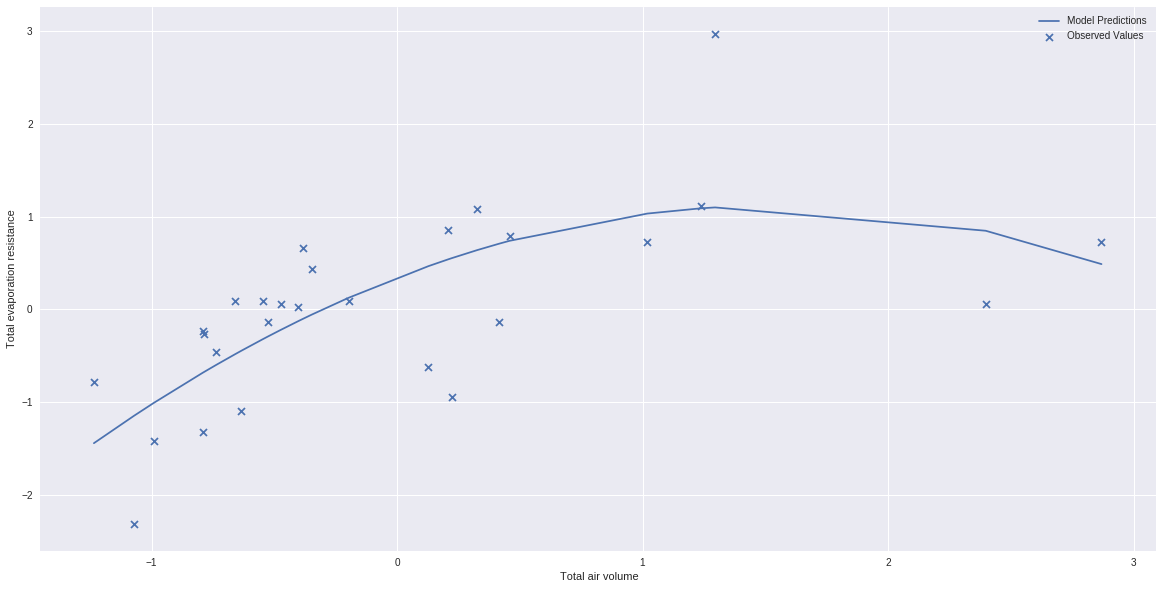

In [ ]:
# Sort data to obtain nice graphs
x, y_hat = zip(*sorted(zip(X_train[:,1], y_hat)))

# (Use x for x axis, y_viz as my y_train data points and y_hat as my final polynomial model)
visualize(x, y_viz, y_hat)
plt.scatter(x,y_viz,marker = 'x', label='Observed Values')
plt.legend()

print("The final loss is: ", loss)

### Model Validation
Fit my model to the test data, X_test and calculate the loss against y_test. Print the loss acquired

In [ ]:
#Fit the model to the test data
y_test_hat= multi_linear_model(W,X_test)

#Calculate the test loss for the polynomial model
loss_test = calculate_MSE(y_test, y_test_hat,m_test)
print(loss_test)

0.29131813511399196


## 5. Findings<a class="anchor" id="Findings"></a>
The test loss for the polynomial model is lower than the test loss for the linear model.